In [1]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [3]:
tf.keras.utils.get_file('horse-or-human.zip',"https://storage.googleapis.com/learning-datasets/horse-or-human.zip")

'C:\\Users\\Lenovo\\.keras\\datasets\\horse-or-human.zip'

In [4]:
import zipfile #to handle zip file

local_zip = 'C:\\Users\\Lenovo\\.keras\\datasets\\horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()

In [5]:
os.listdir('horse-or-human')

['horses', 'humans']

In [6]:
os.listdir('horse-or-human/horses/')

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png',
 'horse02-0.png',
 'horse02-1.png',
 'horse02-2.png',
 'horse02-3.png',
 'horse02-4.png',
 'horse02-5.png',
 'horse02-6.png',
 'horse02-7.png',
 'horse02-8.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse03-1.png',
 'horse03-2.png',
 'horse03-3.png',
 'horse03-4.png',
 'horse03-5.png',
 'horse03-6.png',
 'horse03-7.png',
 'horse03-8.png',
 'horse03-9.png',
 'horse04-0.png',
 'horse04-1.png',
 'horse04-2.png',
 'horse04-3.png',
 'horse04-4.png',
 'horse04-5.png',
 'horse04-6.png',
 'horse04-7.png',
 'horse04-8.png',
 'horse04-9.png',
 'horse05-0.png',
 'horse05-1.png',
 'horse05-2.png',
 'horse05-3.png',
 'horse05-4.png',
 'horse05-5.png',
 'horse05-6.png',
 'horse05-7.png',
 'horse05-8.png',
 'horse05-9.png',
 'horse06-0.png',
 'horse06-1.png',
 'horse06-2.png',
 'horse06-3.png',
 'horse06-4.png',
 'horse06-

In [7]:
os.listdir('horse-or-human/humans/')

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png',
 'human01-10.png',
 'human01-11.png',
 'human01-12.png',
 'human01-13.png',
 'human01-14.png',
 'human01-15.png',
 'human01-16.png',
 'human01-17.png',
 'human01-18.png',
 'human01-19.png',
 'human01-20.png',
 'human01-21.png',
 'human01-22.png',
 'human01-23.png',
 'human01-24.png',
 'human01-25.png',
 'human01-26.png',
 'human01-27.png',
 'human01-28.png',
 'human01-29.png',
 'human01-30.png',
 'human02-00.png',
 'human02-01.png',
 'human02-02.png',
 'human02-03.png',
 'human02-04.png',
 'human02-05.png',
 'human02-06.png',
 'human02-07.png',
 'human02-08.png',
 'human02-09.png',
 'human02-10.png',
 'human02-11.png',
 'human02-12.png',
 'human02-13.png',
 'human02-14.png',
 'human02-15.png',
 'human02-16.png',
 'human02-17.png',
 'human02-18.png',
 'human02-19.png',
 'human02-20.png',
 'human02-21

In [8]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

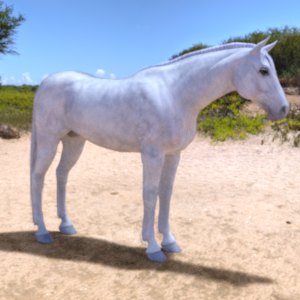

In [9]:
 load_img('horse-or-human/horses/horse01-8.png')

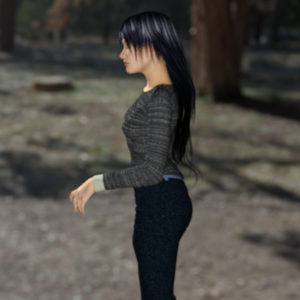

In [10]:
load_img('horse-or-human/humans/human02-06.png')

In [14]:
len(os.listdir('horse-or-human/horses/'))

500

In [15]:
len(os.listdir('horse-or-human/humans/'))

527

In [16]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.models import Sequential
from glob import glob     #to handle folder/Directory

In [19]:
batch_size = 64
epochs = 25
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [20]:
parent = os.path.join('horse-or-human')

In [21]:
parent

'horse-or-human'

In [22]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [24]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory='horse-or-human',
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training',
                                                    class_mode='binary')

Found 822 images belonging to 2 classes.


In [25]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [26]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [28]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory='horse-or-human',
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation',
                                                class_mode='binary')

Found 205 images belonging to 2 classes.


In [29]:
sample_image , labels = next(train_data_gen)

In [30]:
sample_image.shape

(64, 224, 224, 3)

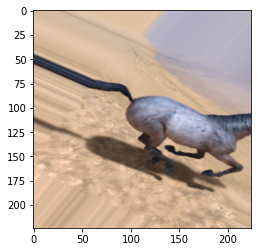

In [31]:
plt.imshow(sample_image[0])
plt.show()

In [32]:
labels

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.], dtype=float32)

In [34]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D

In [35]:
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)), #150
    MaxPooling2D(), #75
    Conv2D(32,3,padding='same',activation='relu'), #75
    MaxPooling2D(),#37
    Conv2D(64,3,padding='same',activation='relu'),#37
    MaxPooling2D(),#18
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [37]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
history = model.fit(train_data_gen,epochs=epochs,
                             validation_data=val_data_gen)

Epoch 1/25
13/13 [==============================] - 26s 2s/step - loss: 1.6061 - accuracy: 0.5255 - val_loss: 0.6998 - val_accuracy: 0.5122
Epoch 2/25
13/13 [==============================] - 23s 2s/step - loss: 0.6020 - accuracy: 0.6606 - val_loss: 0.3745 - val_accuracy: 0.9171
Epoch 3/25
13/13 [==============================] - 23s 2s/step - loss: 0.4771 - accuracy: 0.7567 - val_loss: 0.3696 - val_accuracy: 0.8683
Epoch 4/25
13/13 [==============================] - 23s 2s/step - loss: 0.4238 - accuracy: 0.8066 - val_loss: 0.2669 - val_accuracy: 0.9268
Epoch 5/25
13/13 [==============================] - 23s 2s/step - loss: 0.3231 - accuracy: 0.8625 - val_loss: 0.1688 - val_accuracy: 0.9659
Epoch 6/25
13/13 [==============================] - 22s 2s/step - loss: 0.2817 - accuracy: 0.8723 - val_loss: 0.2928 - val_accuracy: 0.8195
Epoch 7/25
13/13 [==============================] - 23s 2s/step - loss: 0.2990 - accuracy: 0.8637 - val_loss: 0.2681 - val_accuracy: 0.8537
Epoch 8/25
13/13 [==

In [39]:
history.history

{'loss': [1.6061360836029053,
  0.6020046472549438,
  0.4771246612071991,
  0.4237963855266571,
  0.32313990592956543,
  0.281735360622406,
  0.2989943325519562,
  0.2364785373210907,
  0.23329496383666992,
  0.23817116022109985,
  0.19021818041801453,
  0.15875741839408875,
  0.1277971714735031,
  0.14261619746685028,
  0.17668867111206055,
  0.16980139911174774,
  0.11218152940273285,
  0.12354988604784012,
  0.09398145973682404,
  0.11353981494903564,
  0.11361980438232422,
  0.10194295644760132,
  0.07720835506916046,
  0.07968936860561371,
  0.09009617567062378],
 'accuracy': [0.525547444820404,
  0.6605839133262634,
  0.7566909790039062,
  0.8065693378448486,
  0.8625304102897644,
  0.8722627758979797,
  0.8637469410896301,
  0.9038929343223572,
  0.9124087691307068,
  0.9038929343223572,
  0.9367396831512451,
  0.9318735003471375,
  0.9549878239631653,
  0.94525545835495,
  0.9270073175430298,
  0.9294403791427612,
  0.9622871279716492,
  0.9574209451675415,
  0.9695863723754883

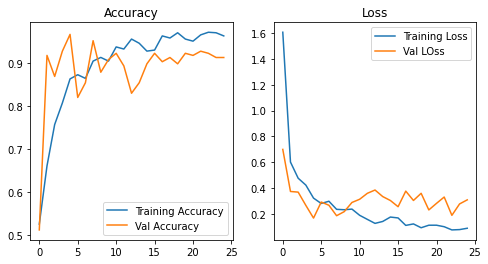

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc=0)
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()